Employee Future Prediction


In [61]:
#description: A company's HR department wants to predict whether some customers would leave the company in next 2 years. Your job is to build a predictive model that predicts the prospects of future and present employee.

In [2]:
# 1.Import the neccessary modules for data manipulation and visual representation:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [5]:
#2.Read the analytics csv file and store our dataset into a dataframe called "employee":
employee=pd.read_csv("Employee.csv")
##Get a quick overview of what we are dealing with
employee.head(10).style.background_gradient(axis=None ,  cmap='YlOrRd')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [4]:
#3.Cleaning the data:
employee.isnull().any()

Education                    False
JoiningYear                  False
City                         False
PaymentTier                  False
Age                          False
Gender                       False
EverBenched                  False
ExperienceInCurrentDomain    False
LeaveOrNot                   False
dtype: bool

In [6]:
#For better clarity
employee = employee.rename(columns={'PaymentTier':'LevelOfPayment','EverBenched':'KeptOrNotOfProject'})
employee.head(5)

,Education,JoiningYear,City,LevelOfPayment,Age,Gender,KeptOrNotOfProject,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [7]:
#4.Statistical Summary of DataSet ;description
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
LevelOfPayment,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0


In [8]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   LeaveOrNot                 4653 non-null   int64 
 1   Education                  4653 non-null   object
 2   JoiningYear                4653 non-null   int64 
 3   City                       4653 non-null   object
 4   LevelOfPayment             4653 non-null   int64 
 5   Age                        4653 non-null   int64 
 6   Gender                     4653 non-null   object
 7   KeptOrNotOfProject         4653 non-null   object
 8   ExperienceInCurrentDomain  4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
#5.For More clarity ::

Age Mean: 29


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


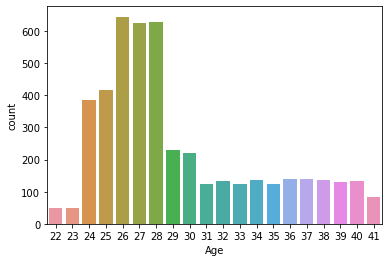

In [9]:
#Average age
print('Age Mean:',int(employee.Age.mean()))
sns.countplot(employee.Age);
#Conclusion : the average age is 29

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


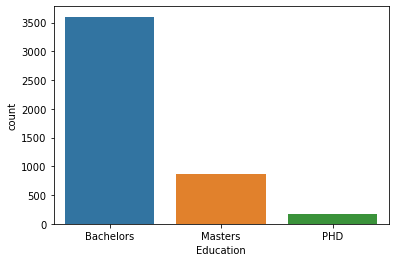

In [35]:
# Education
sns.countplot(employee.Education);

-->most employees are bachelor's degree holders

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


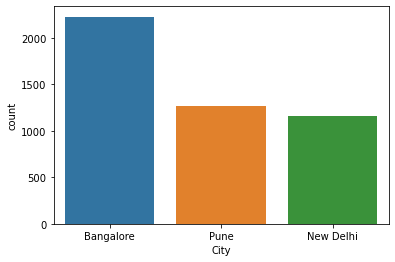

In [34]:
# City
sns.countplot(employee.City);


--> most of the CITY OFFICE WHERE POSTED: Bangalore

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


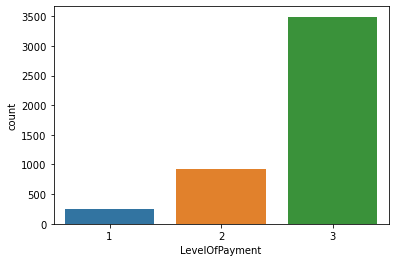

In [31]:
#LevelOfPayment
sns.countplot(employee.LevelOfPayment);

Conclusion::most of employees are paid with paymentTier degre 3 : lowest

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


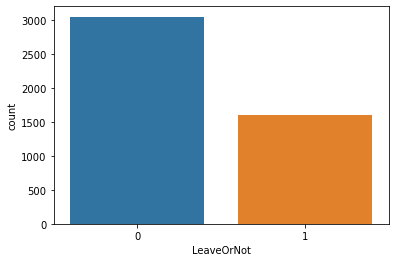

In [30]:
#Average LeaveOrNot
sns.countplot(employee.LeaveOrNot);


Conclusion::50% of employees aims to LEAVES THE COMPANY IN NEXT 2 YEARS

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


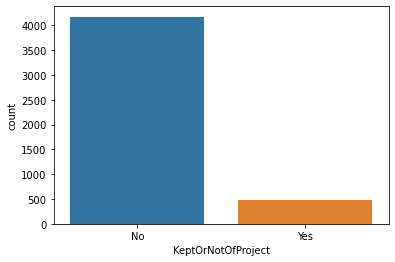

In [29]:
#Average Education
sns.countplot(employee.KeptOrNotOfProject);


Conclusion ::a large majority of the employees has never been kept away from projects for 1 month or more

In [28]:
#6.percentage of employees who stay/ leave
print("Percentage of employees who stay/ leave:")
LeaveOrNOt_rate = employee.LeaveOrNot.value_counts() / len(employee)
LeaveOrNOt_rate



Percentage of employees who stay/ leave:


0    0.656136
1    0.343864
Name: LeaveOrNot, dtype: float64

Conclusion :Looks like about 66% of employees stayed and 34% of employees left.

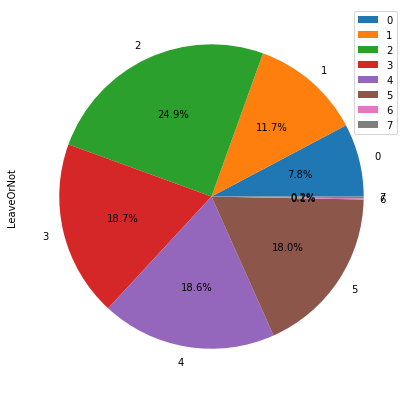

In [36]:
#7.ExperienceInCurrentDomain Vs LeaveOrNot:
ExperienceInCurrentDomain=employee.groupby("ExperienceInCurrentDomain")['LeaveOrNot'].sum().plot.pie(legend=True,
                                                                         figsize=[7,7] ,autopct='%1.1f%%' )


* 24.9% of employees have degre 2 of experience leave the company 
* 18.7% of employees have degre 3 and4 of experience leave the company 
* 18 % of employees have degre 5 of experience leave the company 

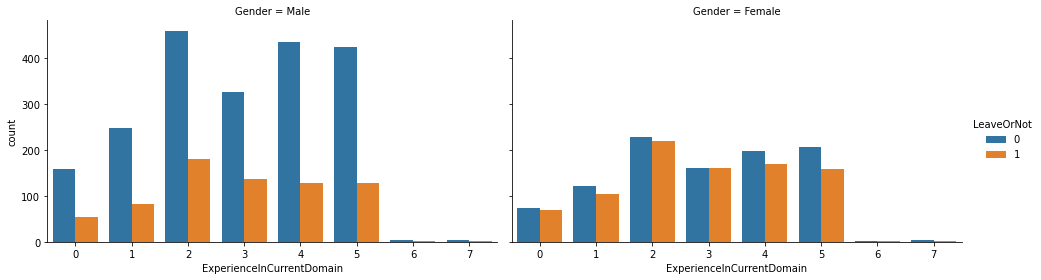

In [18]:
sns.catplot(x="ExperienceInCurrentDomain", hue="LeaveOrNot", col="Gender",
                data=employee, kind="count",
                height=4, aspect=1.7);


* Gender:Male-->50% of male employees leave the company 
* Gender:Female-->There is a balance between the number of employees who leave the company and those who do not leave the company
*  Male leave the company more than Female. 

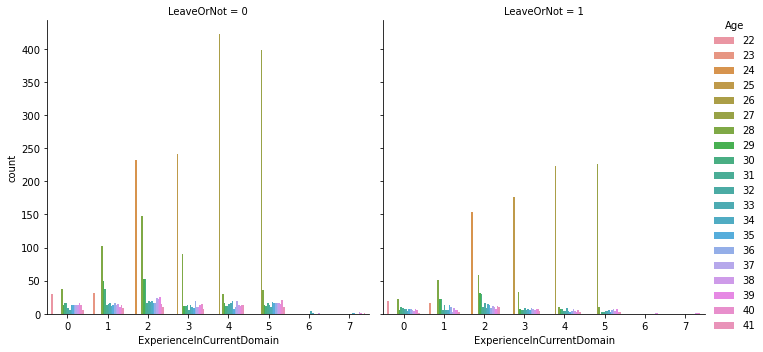

In [20]:
sns.catplot(x="ExperienceInCurrentDomain", hue="Age", col="LeaveOrNot"
                  ,data=employee, kind="count");

* employees between 25 and 26 years old leave the company

<AxesSubplot:ylabel='LeaveOrNot'>

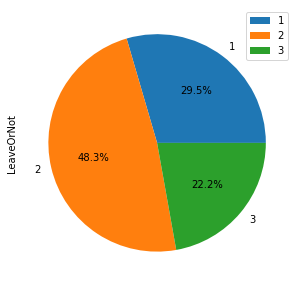

In [49]:
#8.LevelOfPayment Vs LeaveOrNot:
LevelOfPayment=employee.groupby("LevelOfPayment")['LeaveOrNot'].mean().plot.pie( legend=True,
                                                                   figsize=[5,5] ,autopct='%1.1f%%' )
LevelOfPayment

* 48.3% of employees with MID level of paiment leave the company

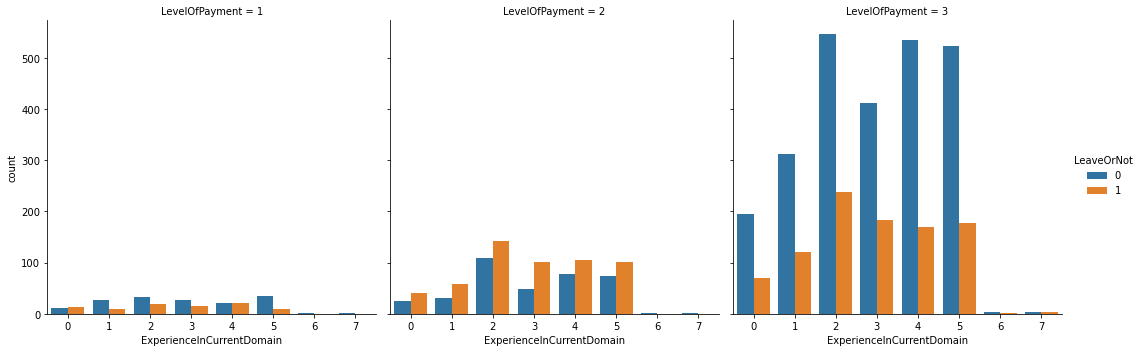

In [19]:
sns.catplot(x="ExperienceInCurrentDomain", hue="LeaveOrNot", col="LevelOfPayment",
                data=employee, kind="count");

* Surprising !50% employees lowest paid employees leave the company
* Most employees with a MID LEVEL of payment leave the company 
* The highest paid employees stay with the company 

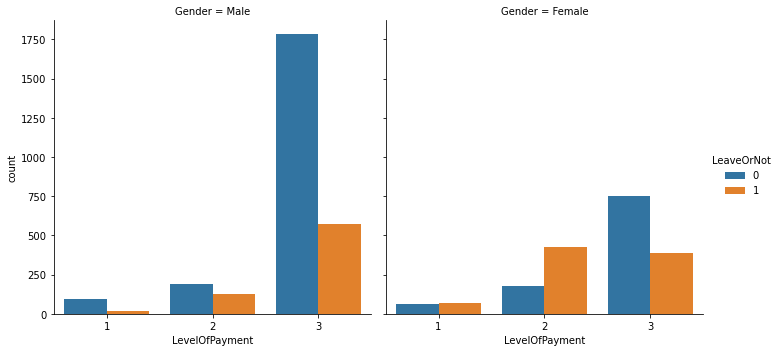

In [22]:
sns.catplot(x="LevelOfPayment", hue="LeaveOrNot", col="Gender"
                  ,data=employee, kind="count");

* most women with an average level of payment leave the company

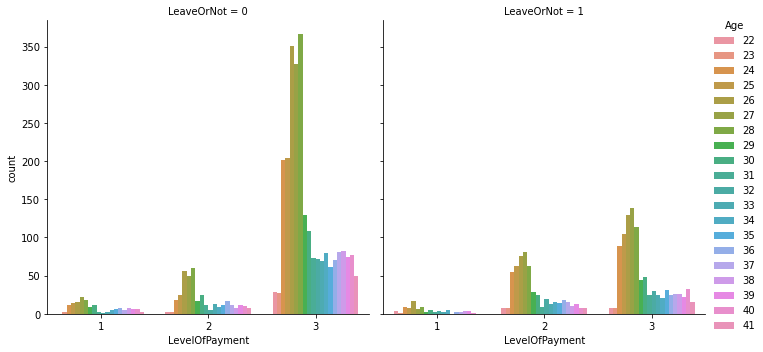

In [23]:
sns.catplot(x="LevelOfPayment", hue="Age", col="LeaveOrNot"
                  ,data=employee, kind="count");

* 27 years old employees with a mid level of payment leave the company 

<AxesSubplot:ylabel='LeaveOrNot'>

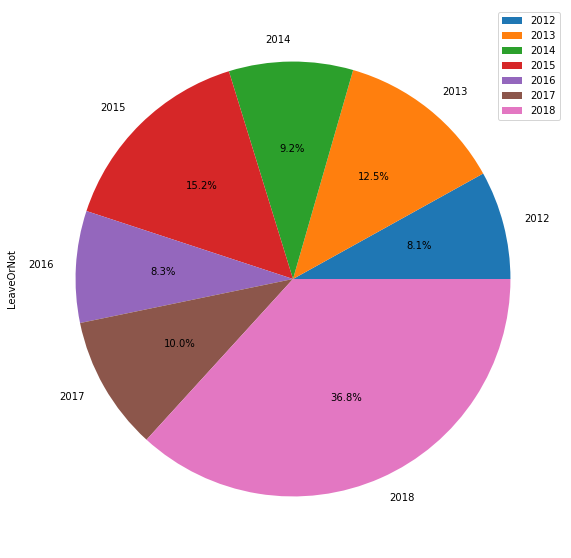

In [38]:
#9.JoiningYear Vs LeaveOrNot:
JoiningYear=employee.groupby("JoiningYear")['LeaveOrNot'].mean().plot.pie( legend=True ,
                                                    figsize=[10,10],autopct='%1.1f%%' )
JoiningYear

* Majority of the employees(38%) joined in 2018  have left the company

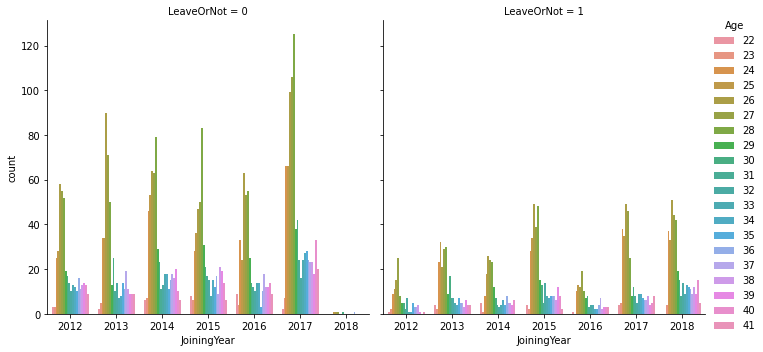

In [25]:
sns.catplot(x="JoiningYear", hue="Age", col="LeaveOrNot"
                  ,data=employee, kind="count");


* A large majority of employees aged 27 leave the company in 2018 
* A large majority of employees age 29 in 2019 remain with the company. 

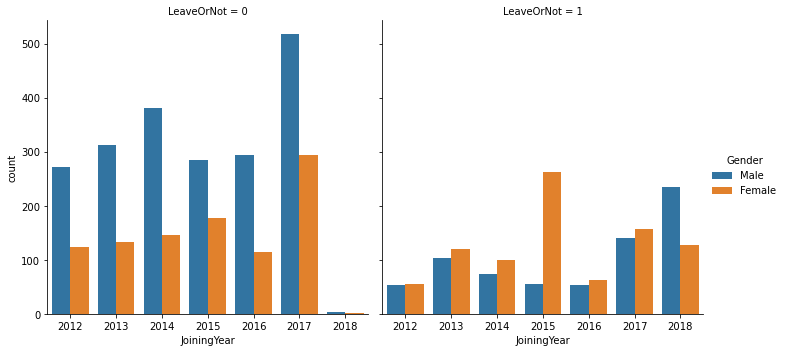

In [26]:
sns.catplot(x="JoiningYear", hue="Gender", col="LeaveOrNot"
                  ,data=employee, kind="count");


* most women leave the company in 2015 but most men leave in 2018 
* most employees stay with the company in 2017

<AxesSubplot:ylabel='LeaveOrNot'>

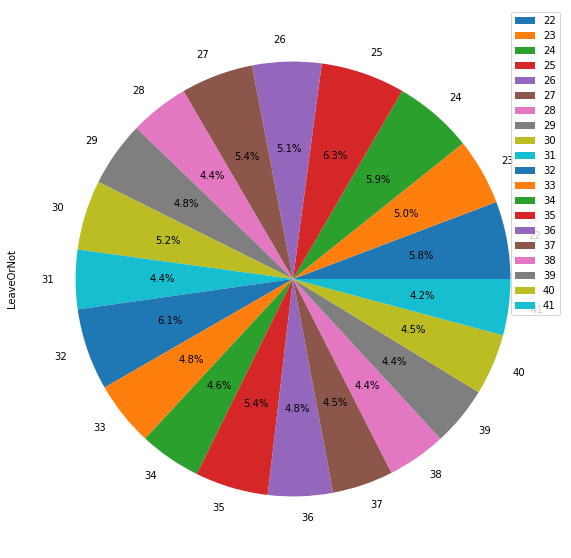

In [39]:
#10.Age Vs LeaveOrNot:
Age=employee.groupby("Age")['LeaveOrNot'].mean().plot.pie( legend=True ,autopct='%1.1f%%' ,figsize=[10,10])
Age

* 6.3% of employees aged 35 years old leave the company

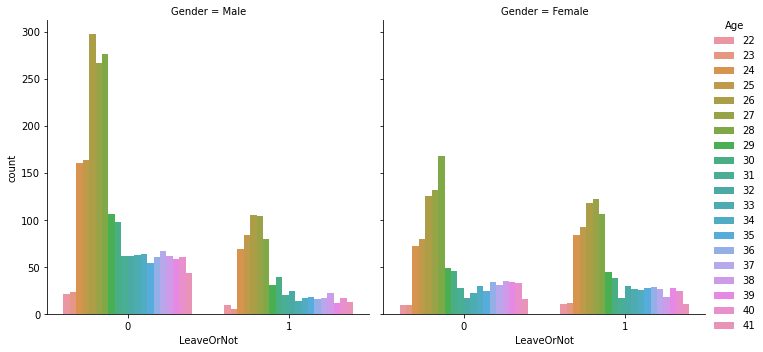

In [28]:
sns.catplot(x="LeaveOrNot", hue="Age", col="Gender"
                  ,data=employee, kind="count");


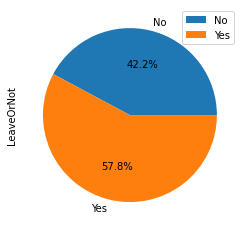

In [40]:
#11.KeptOrNotOfProject Vs LeaveOrNot:
KeptOrNotOfProject=employee.groupby("KeptOrNotOfProject")['LeaveOrNot'].mean().plot.pie(legend=True,autopct='%1.1f%%' )

* 57.8% of employers EVER KEPT OUT OF PROJECTS FOR 1 MONTH OR MORE leave the company 

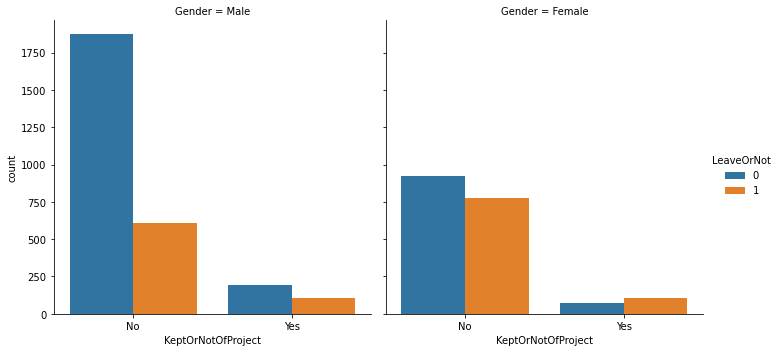

In [31]:
sns.catplot(x="KeptOrNotOfProject", hue="LeaveOrNot", col="Gender"
                  ,data=employee, kind="count");


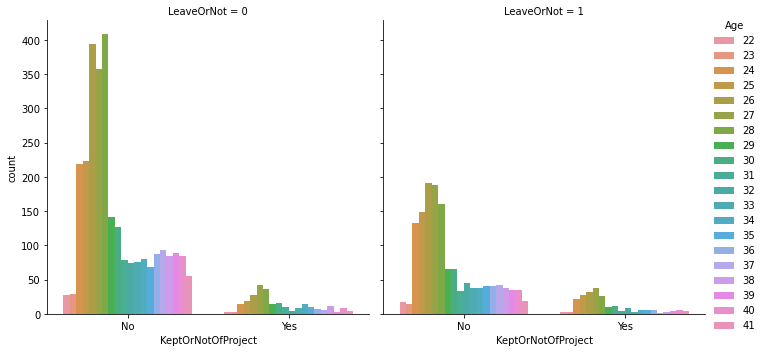

In [32]:
sns.catplot(x="KeptOrNotOfProject", hue="Age", col="LeaveOrNot"
                  ,data=employee, kind="count");


<AxesSubplot:ylabel='LeaveOrNot'>

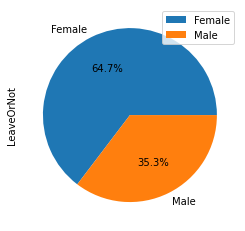

In [41]:
#12.Gender Vs LeaveOrNot:
Gender=employee.groupby("Gender")['LeaveOrNot'].mean().plot.pie(legend=True,autopct='%1.1f%%' )
Gender

* 64.7% of female employees leave the company 

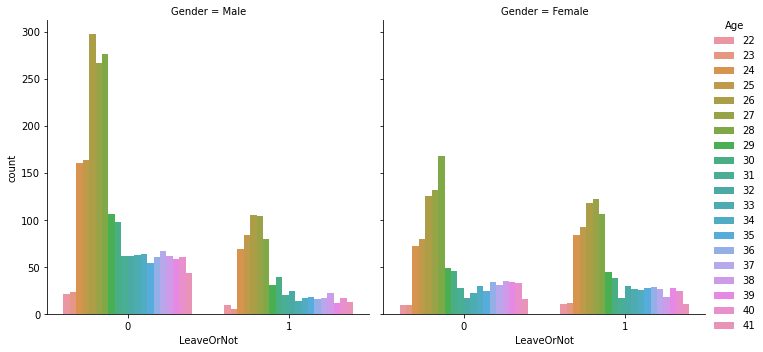

In [34]:
sns.catplot(x="LeaveOrNot", hue="Age", col="Gender"
                  ,data=employee, kind="count");

<AxesSubplot:ylabel='LeaveOrNot'>

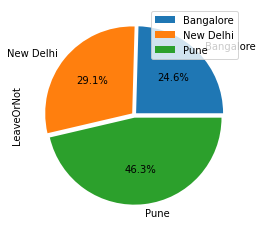

In [66]:
#13.City Vs LeaveOrNot:
City=employee.groupby("City")['LeaveOrNot'].mean().plot.pie(explode=[0.03,0.03,0.03] ,legend=True,autopct='%1.1f%%' )
City

* Most (46.3% )Pune's employee leave the company

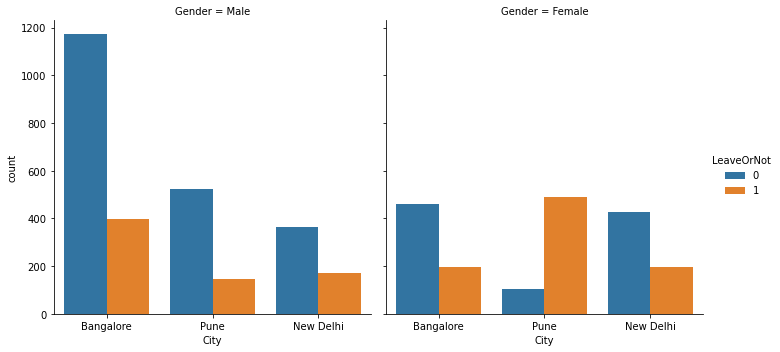

In [37]:
sns.catplot(x="City", hue="LeaveOrNot", col="Gender"
                  ,data=employee, kind="count");


* Most female employees in Pune leave the company 
* most of Bangalore's employees stay in the company 



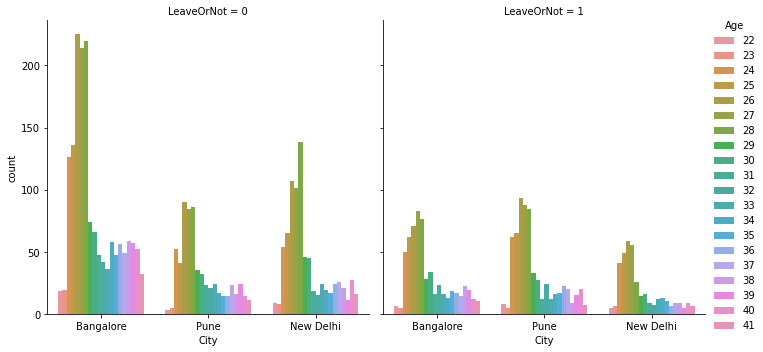

In [38]:
sns.catplot(x="City", hue="Age", col="LeaveOrNot"
                  ,data=employee, kind="count");


<AxesSubplot:ylabel='LeaveOrNot'>

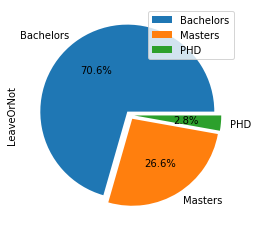

In [51]:
#14.Education vs LeaveOrNot:
LeaveOrNot=employee.groupby("Education")["LeaveOrNot"].sum().plot.pie(explode=[0.05,0.05,0.05],legend=True,autopct='%1.1f%%' )
LeaveOrNot


* Most (70.6%)of employees with Bachelors degree leave the company 

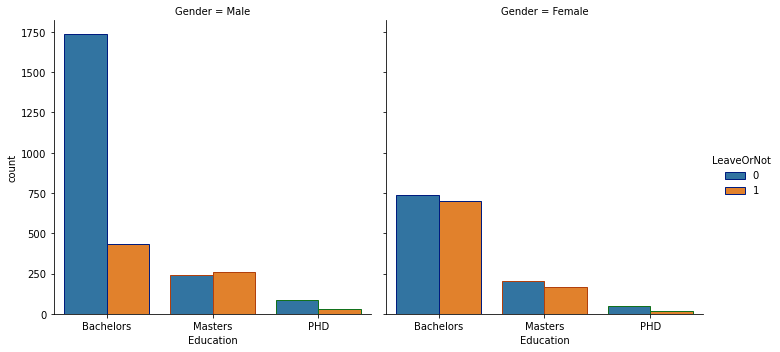

In [78]:
sns.catplot(x="Education", hue="LeaveOrNot", col="Gender",edgecolor=sns.color_palette("dark", 3)
                  ,data=employee, kind="count");


* For the bachelor's degree: Female employers leave the company more than male 
* For Masters's degree: Male employers leave the company more than Female 

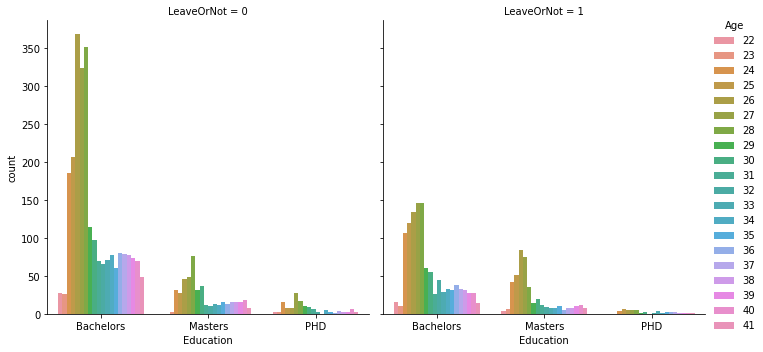

In [41]:
sns.catplot(x="Education", hue="Age", col="LeaveOrNot"
                  ,data=employee, kind="count");


Correlation Matrix & Heatmap

<AxesSubplot:ylabel='JoiningYear'>

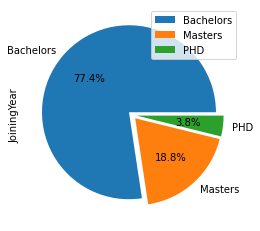

In [ ]:
#15.The Education levels of employees :
explode = (0.05, 0.05, 0.05)
employee.groupby("Education")["JoiningYear"].sum().plot.pie(legend=True, explode=explode ,autopct='%1.1f%%' , figsize=[4,4])


* Around 77% of employees hold a Bachelors degree.
* Around 19% hold a Master's degree.
* Around 4% are PhDs.

<AxesSubplot:ylabel='Gender'>

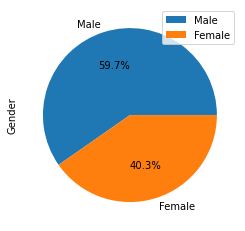

In [67]:
# 16.How is the Employee strength spread over office locations?
employee.Gender.value_counts().plot.pie(rot=45 ,legend=True,autopct='%1.1f%%' )

* 59.7% Male employees leave the company
* 40.3% Female employees leave the company 

<AxesSubplot:ylabel='City'>

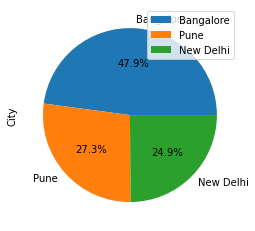

In [72]:
# 17.How is the Employee strength spread over office locations?
employee.City.value_counts().plot.pie(legend=True,autopct='%1.1f%%' )

* 47.9% of the workforce is based in Bangalore only.

<AxesSubplot:ylabel='LevelOfPayment'>

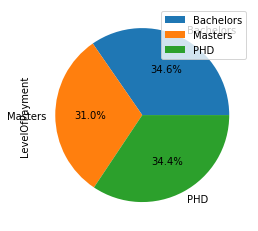

In [73]:
# 18.Does Employee's Education affect Payment Tiers?
employee.groupby("Education")["LevelOfPayment"].mean().plot.pie( legend=True,autopct='%1.1f%%')

In [74]:
#19. Does Gender across Payment Tiers affect an Employee's decision whether he/she leaves the company or not?
employee.groupby(["LevelOfPayment","LeaveOrNot","Gender"]).sum()

JoiningYear    Age  \
LevelOfPayment LeaveOrNot Gender                       
1              0          Female       124899   1810   
                          Male         185385   2806   
               1          Female       138999   1975   
                          Male          40288    600   
2              0          Female       362963   5356   
                          Male         379130   5594   
               1          Female       856443  12346   
                          Male         251938   3494   
3              0          Female      1508925  22201   
                          Male        3589937  52516   
               1          Female       786066  11467   
                          Male        1151115  16602   

                                  ExperienceInCurrentDomain  
LevelOfPayment LeaveOrNot Gender                             
1              0          Female                        176  
                          Male                          265  
               1          Female                        176  
                          Male                           54  
2              0          Female                        513  
                          Male                          575  
               1          Female                       1231  
                          Male                          344  
3              0          Female                       2218  
                          Male                         5229  
               1          Female                       1103  
                          Male                         1636

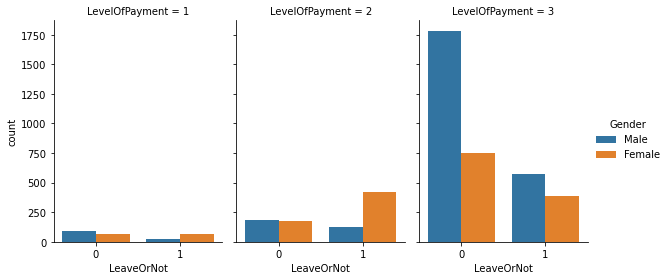

In [51]:
g = sns.catplot(x="LeaveOrNot", hue="Gender", col="LevelOfPayment",
                data=employee, kind="count",
                height=4, aspect=.7);


* For level 3 payment, Male leave more than Female, unlike level 2 and 1

In [48]:
#Correlation Matrix
employee.corr()

,LeaveOrNot,JoiningYear,LevelOfPayment,Age,ExperienceInCurrentDomain
LeaveOrNot,1.000000,0.181705,-0.197638,-0.051126,-0.030504
JoiningYear,0.181705,1.000000,-0.096078,0.013165,-0.036525
LevelOfPayment,-0.197638,-0.096078,1.000000,0.007631,0.018314
Age,-0.051126,0.013165,0.007631,1.000000,-0.134643
ExperienceInCurrentDomain,-0.030504,-0.036525,0.018314,-0.134643,1.000000


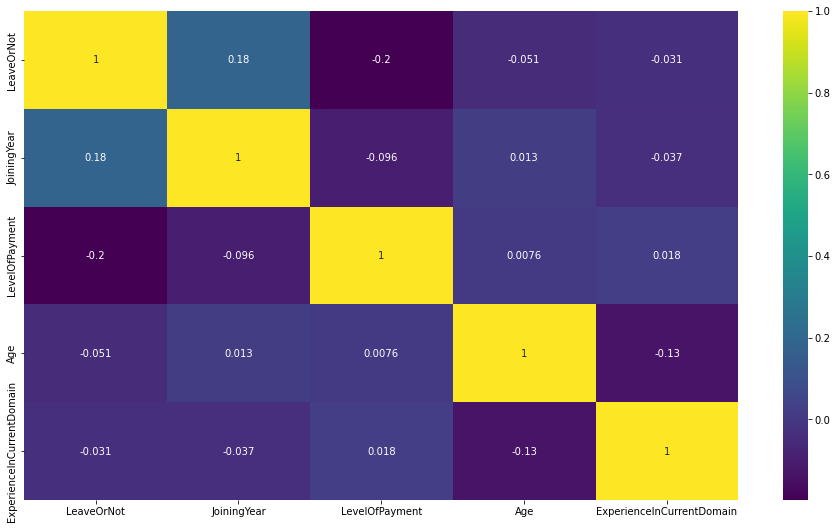

In [49]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(employee.corr(),annot = True,cmap = 'viridis')
plt.show()

Bivariate Analysis On Categorical Features

In [54]:
#Education Vs LeaveOrNot
employee.groupby(['LeaveOrNot','Education']).agg([len,min,max])

JoiningYear              City                   \
                             len   min   max   len        min   max   
LeaveOrNot Education                                                  
0          Bachelors        2472  2012  2018  2472  Bangalore  Pune   
           Masters           447  2012  2018   447  Bangalore  Pune   
           PHD               134  2012  2017   134  Bangalore  Pune   
1          Bachelors        1129  2012  2018  1129  Bangalore  Pune   
           Masters           426  2012  2018   426  Bangalore  Pune   
           PHD                45  2013  2018    45  Bangalore  Pune   

                     LevelOfPayment           Age  ...     Gender          \
                                len min max   len  ... max    len     min   
LeaveOrNot Education                               ...                      
0          Bachelors           2472   1   3  2472  ...  41   2472  Female   
           Masters              447   1   3   447  ...  41    447  Female   
           PHD                  134   1   3   134  ...  41    134  Female   
1          Bachelors           1129   1   3  1129  ...  41   1129  Female   
           Masters              426   1   3   426  ...  41    426  Female   
           PHD                   45   1   3    45  ...  41     45  Female   

                           KeptOrNotOfProject           \
                       max                len min  max   
LeaveOrNot Education                                     
0          Bachelors  Male               2472  No  Yes   
           Masters    Male                447  No  Yes   
           PHD        Male                134  No  Yes   
1          Bachelors  Male               1129  No  Yes   
           Masters    Male                426  No  Yes   
           PHD        Male                 45  No  Yes   

                     ExperienceInCurrentDomain          
                                           len min max  
LeaveOrNot Education                                    
0          Bachelors                      2472   0   7  
           Masters                         447   0   5  
           PHD                             134   0   5  
1          Bachelors                      1129   0   7  
           Masters                         426   0   7  
           PHD                              45   0   5  

[6 rows x 21 columns]

In [56]:
employee.groupby(['LeaveOrNot','Education']).mean()


JoiningYear  LevelOfPayment        Age  \
LeaveOrNot Education                                           
0          Bachelors  2014.654531        2.852751  29.506877   
           Masters    2015.800895        2.380313  30.078300   
           PHD        2014.552239        2.738806  29.082090   
1          Bachelors  2015.384411        2.534987  29.239150   
           Masters    2015.812207        2.553991  28.464789   
           PHD        2016.533333        2.711111  29.933333   

                      ExperienceInCurrentDomain  
LeaveOrNot Education                             
0          Bachelors                   2.982605  
           Masters                     2.702461  
           PHD                         2.947761  
1          Bachelors                   2.752879  
           Masters                     3.075117  
           PHD                         2.800000